In [1]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [4]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [6]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.81
logreg 점수: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차행렬:\n",confusion)

오차행렬:
 [[402   1]
 [  6  41]]


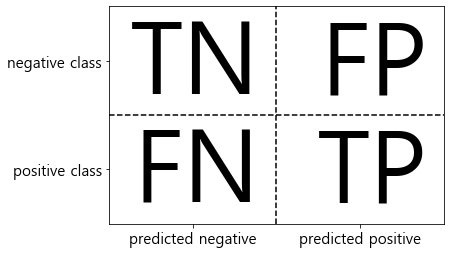

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

# 잘 분류 : TN, TP
# 잘못 분류 : FN, FP

In [11]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

# 양성인데 음성으로, 음성인데 양성으로 나온 것을 최소화하는 것을 목표

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[365  38]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


In [12]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_dummy)))
print("트리모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.07
트리모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(classification_report(y_test, pred_dummy, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.91      0.90       403
           9       0.07      0.06      0.07        47

    accuracy                           0.82       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.82      0.81       450



In [16]:
print(classification_report(y_test, pred_logreg, target_names = ['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [19]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

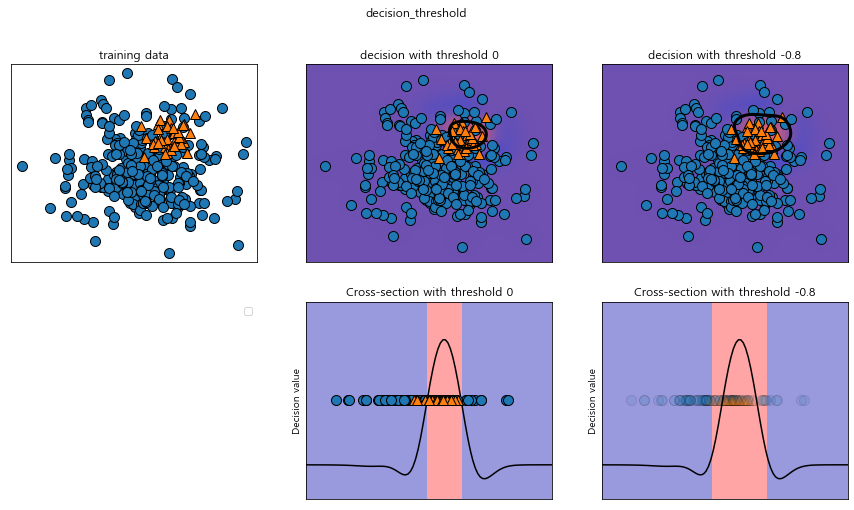

In [20]:
mglearn.plots.plot_decision_threshold()

In [22]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [30]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [31]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

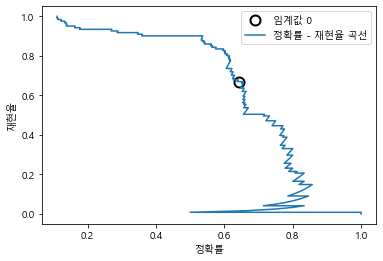

In [33]:
X, y = make_blobs(n_samples = (4000, 500), cluster_std = [7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

svc = SVC(gamma = .05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
        label = "임계값 0", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label = "정확률 - 재현율 곡선")
plt.xlabel("정확률")
plt.ylabel("재현율")
plt.legend(loc = "best")

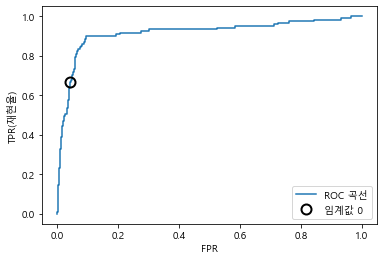

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
        label = "임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc = 4)

In [39]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = "SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label = "RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
        label = "SVC 임계값 0", fillstyle = 'none', c = 'k', mew = 2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, 
        label = "RF 임계값 0.5", fillstyle = "none", c = 'k', mew = 2)

plt.legend(loc = 4)

NameError: name 'rf' is not defined